In [9]:
import os 
import pandas as pd 
import numpy as np 

In [10]:
#reading and filtering out the data
csv_file="raw_Mar31.csv"
raw_rp_data=pd.read_csv(csv_file,index_col=None)

print(raw_rp_data.shape)
print(raw_rp_data.columns)

#filter only videos and valid RP values
rp_data=raw_rp_data.loc[(raw_rp_data != -1).all(axis=1) & raw_rp_data["Filename"].str.endswith(".mp4")].copy()
rp_data.index = pd.RangeIndex(0, len(rp_data))
print(rp_data.shape) #valid rp_data

(11577, 148)
Index(['Filename', 'Advertiser', 'Date', 'Version', 'Country', 'Duration',
       'Description', 'Brand/Product', 'ProductAdvertiser', 'Title',
       ...
       'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7', 'masculine_faces',
       'feminine_faces', 'video_key_to_match', 'brand_category'],
      dtype='object', length=148)
(7648, 148)


Average screentimes: 0.7519333886514175 0.24806661134858254
Median screentimes: 0.9579509415958014 0.04204905840419859


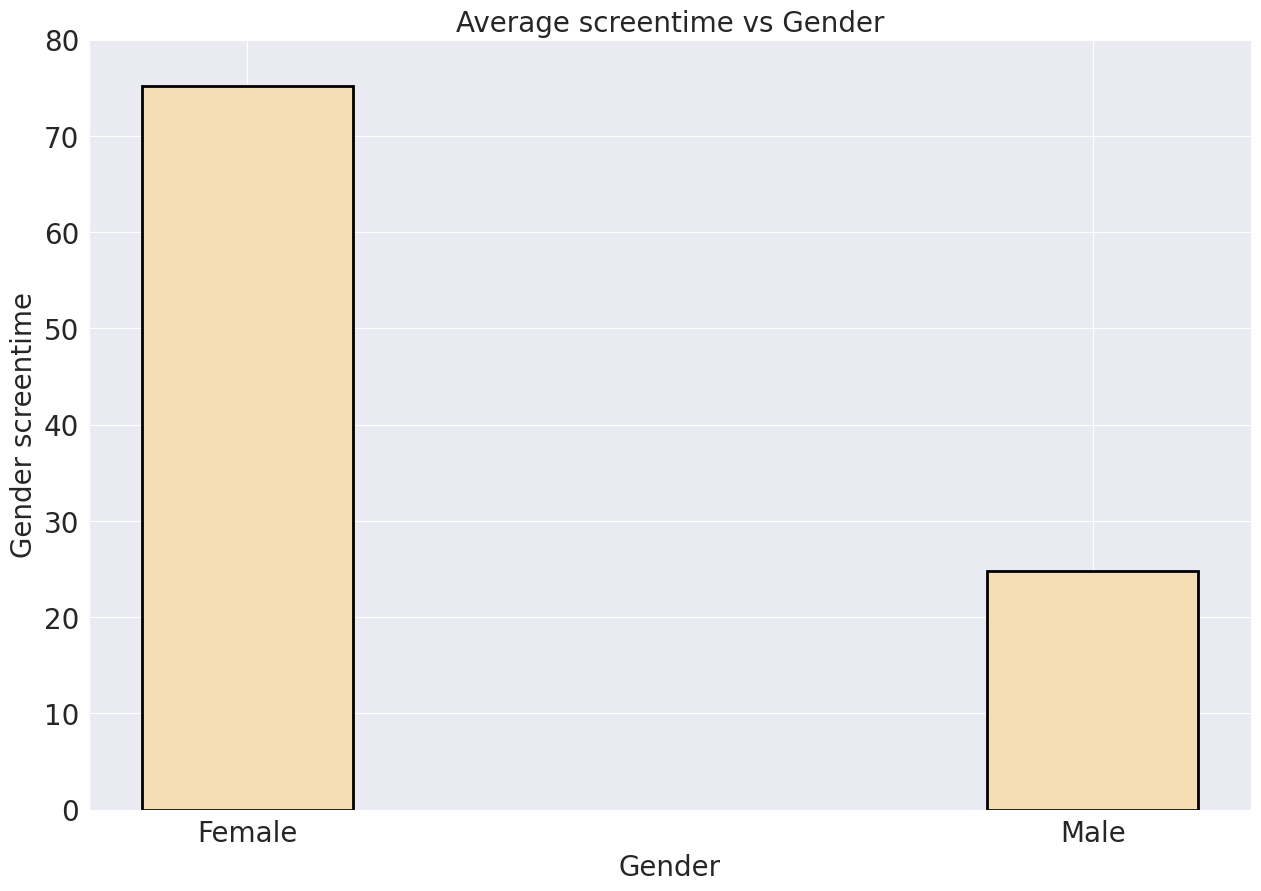

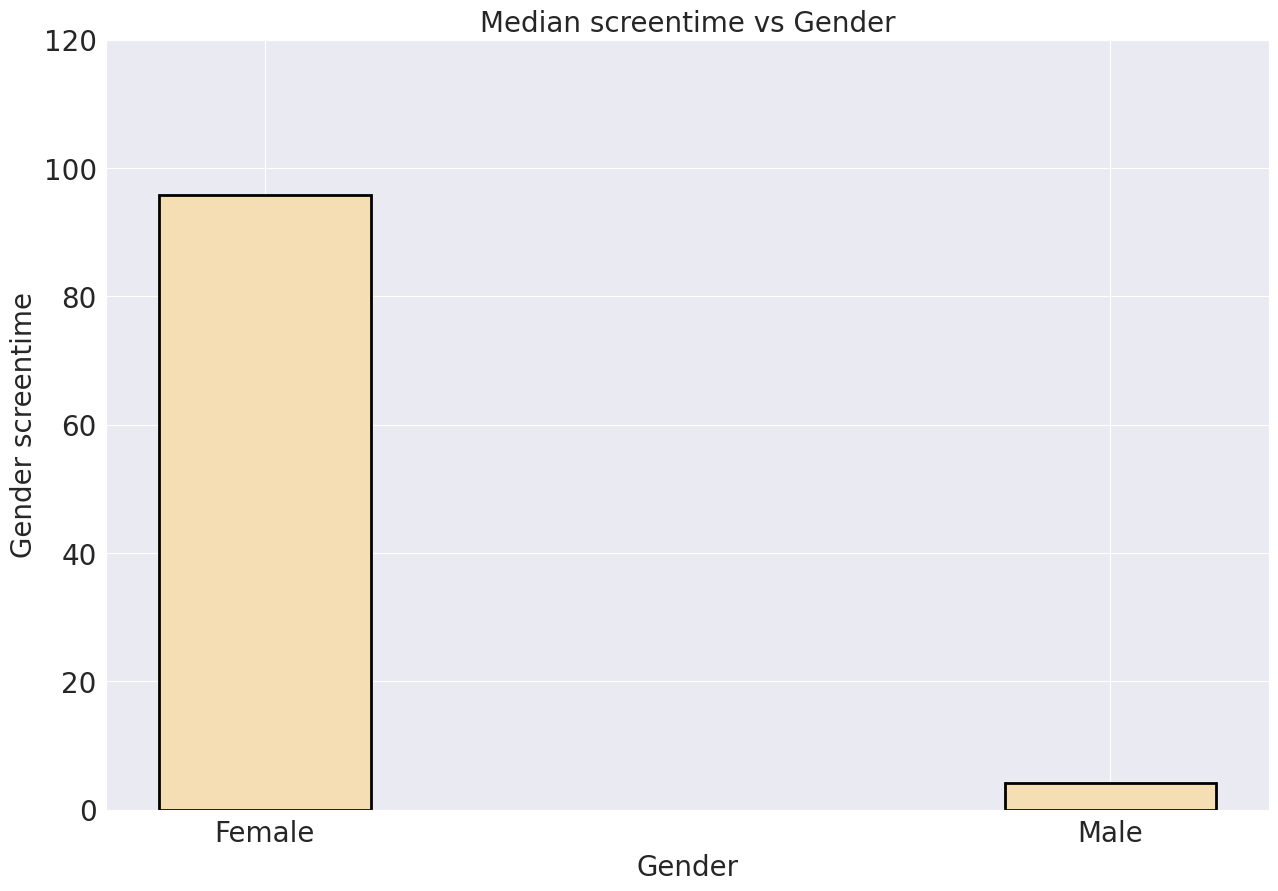

In [11]:
#compute female screentime and male screentime and plot the average and median
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

plt.rcParams["figure.figsize"] = (15,10)

rp_data['female_screentime']=rp_data['feminine_faces']/(rp_data['masculine_faces']+rp_data['feminine_faces'])
rp_data['male_screentime']=rp_data['masculine_faces']/(rp_data['masculine_faces']+rp_data['feminine_faces'])

#plot the average male and female screentime
average_female_screentime=rp_data['female_screentime'].mean()
average_male_screentime=rp_data['male_screentime'].mean()

median_female_screentime=rp_data['female_screentime'].median()
median_male_screentime=rp_data['male_screentime'].median()

print('Average screentimes:',average_female_screentime,average_male_screentime)
print('Median screentimes:',median_female_screentime,median_male_screentime)

####################################plot the average male vs female screentime#######################################
# create a figure and axis object
fig, ax = plt.subplots()

keys=['Female','Male']
# create a bar plot of the dictionary
ax.bar(keys,[average_female_screentime*100,average_male_screentime*100],
       edgecolor='black',linewidth=2, color='#F5DEB3', width=0.25)

# set the title and axis labels
ax.set_title('Average screentime vs Gender', fontsize=20)
ax.set_xlabel('Gender', fontsize=20)
ax.set_ylabel('Gender screentime', fontsize=20)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

#plt.show()
#save the plots
plt.savefig('plots/average_gender_screentime.png',dpi=300)


########################################### plot the median male vs female screentime ########################################
# create a figure and axis object
fig, ax = plt.subplots()

keys=['Female','Male']
# create a bar plot of the dictionary
ax.bar(keys,[median_female_screentime*100,median_male_screentime*100],
           edgecolor='black',
           linewidth=2, color='#F5DEB3', width=0.25)

# set the title and axis labels
ax.set_title('Median screentime vs Gender', fontsize=20)
ax.set_xlabel('Gender', fontsize=20)
ax.set_ylabel('Gender screentime', fontsize=20)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

#plt.show()
plt.savefig('plots/median_gender_screentime.png',dpi=300)

In [4]:
rp_data[['female_screentime','male_screentime','feminine_faces','masculine_faces']]

,female_screentime,male_screentime,feminine_faces,masculine_faces
0,0.852234,0.147766,248,43
1,0.088020,0.911980,36,373
2,0.004673,0.995327,1,213
3,0.909677,0.090323,423,42
4,0.984615,0.015385,448,7
...,...,...,...,...
7643,0.996032,0.003968,1255,5
7644,0.975758,0.024242,483,12
7645,0.993902,0.006098,163,1
7646,0.695833,0.304167,167,73


In [25]:
0.996032+0.003968

1.0

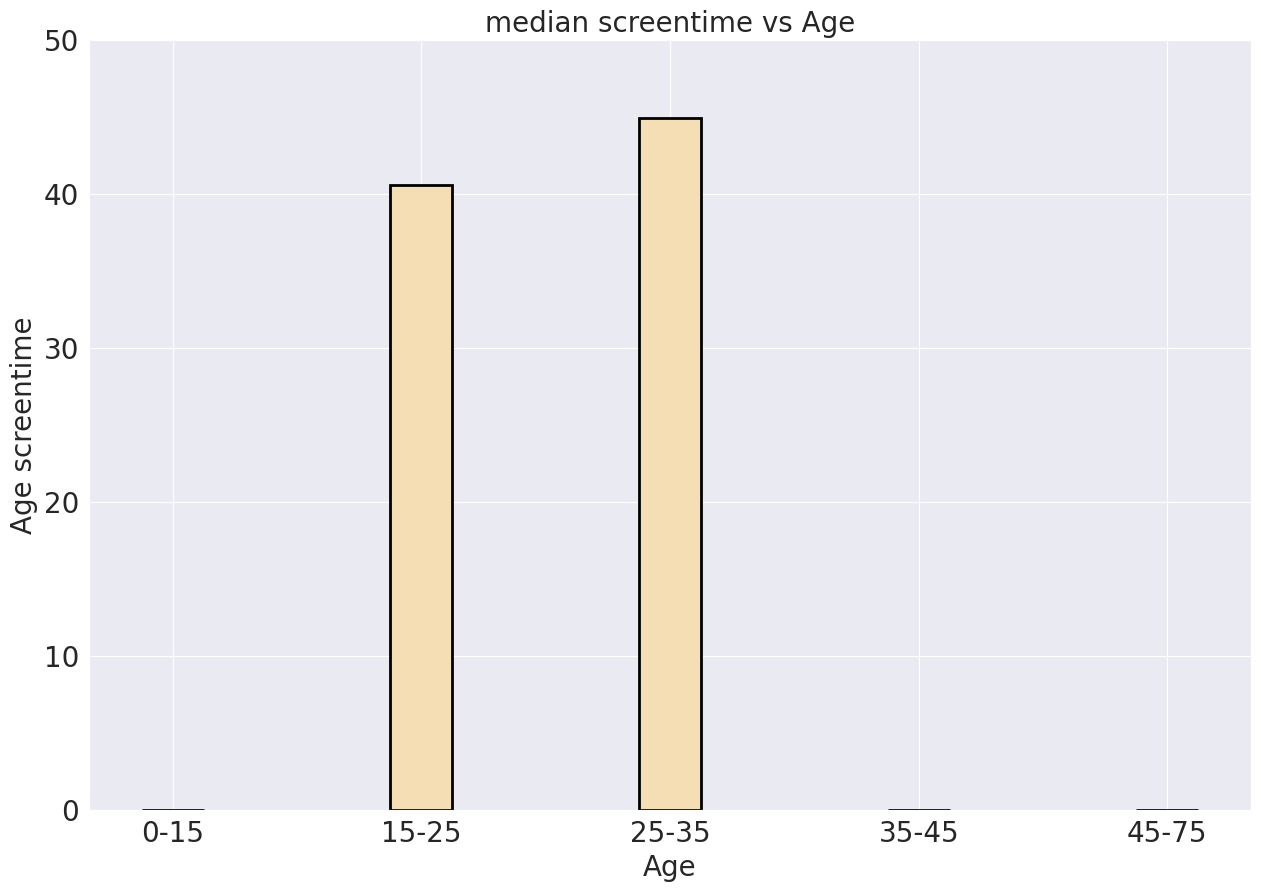

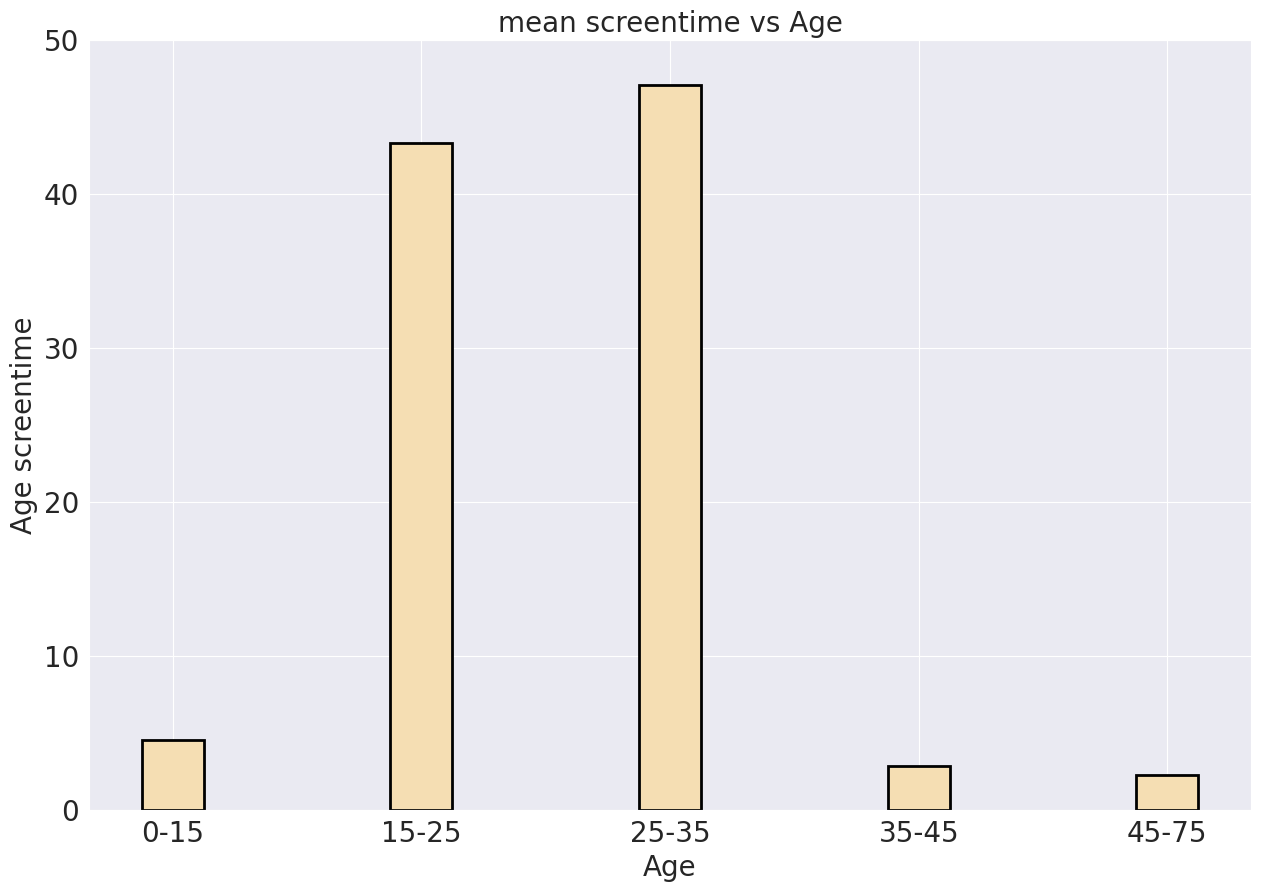

In [12]:
#age analysis 
def plot_age_screentime(data,keys,metric="median"):
    
    fig, ax = plt.subplots()
    # create a bar plot of the dictionary
    ax.bar(keys,data,edgecolor='black',linewidth=2, color='#F5DEB3', width=0.25)

    # set the title and axis labels
    title=metric+" screentime vs Age"
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Age', fontsize=20)
    ax.set_ylabel('Age screentime', fontsize=20)

    # get the x-tick labels
    labels = ax.get_xticklabels()
    yticks = ax.get_yticks()
    ax.set_yticks(yticks)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

    #plt.show()
    #save the plots
    filename=metric+"_age_screentime.png"
    plt.savefig('plots/'+filename,dpi=300)
    

'''
age_1: (0,15)
age_2: (15,25)
age_3: (25,35)
age_4: (35,45)
age_5: (45,55)
age_6: (55,65)
age_7: (65,75)

'''

#create age group 8 for combining age_5, age_6, age_7
rp_data['age_8']=rp_data['age_5']+rp_data['age_6']+rp_data['age_7']

#cross check for intersection age bins

dict_age_mapping={'age_1':"0-15",
                 'age_2':"15-25",
                 'age_3': "25-35",
                  'age_4': "35-45",
                  'age_8':"45-75"}

#average age screentime 
rp_data['total_faces']=rp_data['feminine_faces']+rp_data['masculine_faces']

#screentime estimates
mean_age_wise_screentime=[]
median_age_wise_screentime=[]
values=[]

for key in list(dict_age_mapping.keys()):
    
    rp_data[key+"_screentime"]=(rp_data[key])/(rp_data['total_faces'])
    mean_age_wise_screentime.append(rp_data[key+"_screentime"].mean()*100)
    median_age_wise_screentime.append(rp_data[key+"_screentime"].median()*100)
    values.append(dict_age_mapping[key])

plot_age_screentime(median_age_wise_screentime,values,metric="median")
plot_age_screentime(mean_age_wise_screentime,values,metric="mean")


0       11
1        0
2        0
3        0
4        0
        ..
7643     5
7644     0
7645     1
7646     0
7647     0
Name: age_8, Length: 7648, dtype: int64

In [41]:
sum(mean_age_wise_screentime)

1.0

In [40]:
median_age_wise_screentime

[0.0, 0.40555555555555556, 0.4492753623188406, 0.0, 0.0]

In [13]:
#skintone combination 
import re 
skintone_strings=["[-inf, 1.1)",
                      "[1.1, 2.1)","[2.1, 3.1)","[3.1, 4.1)","[4.1, 5.1)","[5.1, 6.1)","[6.1, 7.1)","[7.1, 8.1)","[8.1, 9.1)","[9.1, 10.1)"]

mst_skintone_dict={'light': ["[-inf, 1.1)","[1.1, 2.1)","[2.1, 3.1)"],
                   'medium': ["[3.1, 4.1)","[4.1, 5.1)","[5.1, 6.1)","[6.1, 7.1)"],
                   'dark': ["[7.1, 8.1)","[8.1, 9.1)","[9.1,10.1)"]
                  }
mst_interval_dict={"[-inf, 1.1)":"light",
                    "[1.1, 2.1)":"light",
                    "[2.1, 3.1)": "light",
                    "[3.1, 4.1)": "medium",
                     "[4.1, 5.1)":"medium",
                     "[5.1, 6.1)": "medium",
                     "[6.1, 7.1)": "medium",
                     "[7.1, 8.1)": "dark",
                     "[8.1, 9.1)":"dark",
                      "[9.1,10.1)":"dark"}

mst_skintone_group_dict={'light':[],'medium':[],'dark':[]}

dict_skintone_screentime=dict()

for string_example in skintone_strings:
    
    col_sample=[col for col in rp_data.columns if string_example in col]
    if(string_example=="[9.1, 10.1)"):
        print(col_sample)
        
    sample_df=rp_data[col_sample]
    curr_sum=sample_df.sum(axis=1)
    rp_data[string_example]=curr_sum
    
    
    
    

['(female, [15, 25), [9.1, 10.1))', '(female, [25, 35), [9.1, 10.1))', '(male, [15, 25), [9.1, 10.1))', '(male, [25, 35), [9.1, 10.1))']


In [39]:
rp_data["[9.1, 10.1)"].sum()

39

In [14]:
#compute light, medium and dark screentime
rp_data['light']=rp_data['[-inf, 1.1)']+rp_data['[1.1, 2.1)']+rp_data['[2.1, 3.1)']
rp_data['medium']=rp_data['[3.1, 4.1)']+rp_data['[4.1, 5.1)']+rp_data['[5.1, 6.1)']+rp_data['[6.1, 7.1)']
rp_data['dark']=rp_data['[7.1, 8.1)']+rp_data['[8.1, 9.1)']+rp_data['[9.1, 10.1)']

#assert with light, medium and dark 
cols_to_sum=['light','medium','dark']

check_equal=0
#loop over and check the sums with total_faces
for i in np.arange(rp_data.shape[0]):
    if(rp_data['light'].iloc[i]+rp_data['medium'].iloc[i]+rp_data['dark'].iloc[i]==rp_data['total_faces'].iloc[i]):
        check_equal=check_equal+1
    else:
        sum_mst_skintone=rp_data['light'].iloc[i]+rp_data['medium'].iloc[i]+rp_data['dark'].iloc[i]
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        print('Sum mst skintone:%d' %(sum_mst_skintone))
        print('Total faces:%d' %(rp_data['total_faces'].iloc[i]))
        print('Feminine faces:%d' %(rp_data['feminine_faces'].iloc[i]))
        print('Masculine faces:%d' %(rp_data['masculine_faces'].iloc[i]))
        print(rp_data['Filename'].iloc[i])
        #print(sum_mst_skintone,rp_data['total_faces'].iloc[i],i,rp_data['feminine_faces'].iloc[i],rp_data['masculine_faces'].iloc[i])

In [42]:
print(rp_data.shape[0])

7648


In [15]:
check_equal

7648

In [14]:
rp_data['feminine_faces'].iloc[0]

248

In [15]:
rp_data['masculine_faces'].iloc[0]

43

In [26]:
print(rp_data.columns)

Index(['Filename', 'Advertiser', 'Date', 'Version', 'Country', 'Duration',
       'Description', 'Brand/Product', 'ProductAdvertiser', 'Title',
       ...
       '[2.1, 3.1)', '[3.1, 4.1)', '[4.1, 5.1)', '[5.1, 6.1)', '[6.1, 7.1)',
       '[7.1, 8.1)', '[8.1, 9.1)', 'light', 'medium', 'dark'],
      dtype='object', length=169)


[(1.0, 3730), (0.0, 249), (0.75, 31), (0.6666666666666666, 26), (0.5072463768115942, 22)]
[(0.0, 4410), (1.0, 108), (0.125, 18), (0.1935483870967742, 18), (0.25, 15)]
[(0.0, 5670), (1.0, 78), (0.25, 53), (0.4927536231884058, 23), (0.3333333333333333, 19)]
[99.35894801725908, 0.0, 0.0]
[81.39517346708536, 12.010329121603872, 6.594497411310771]


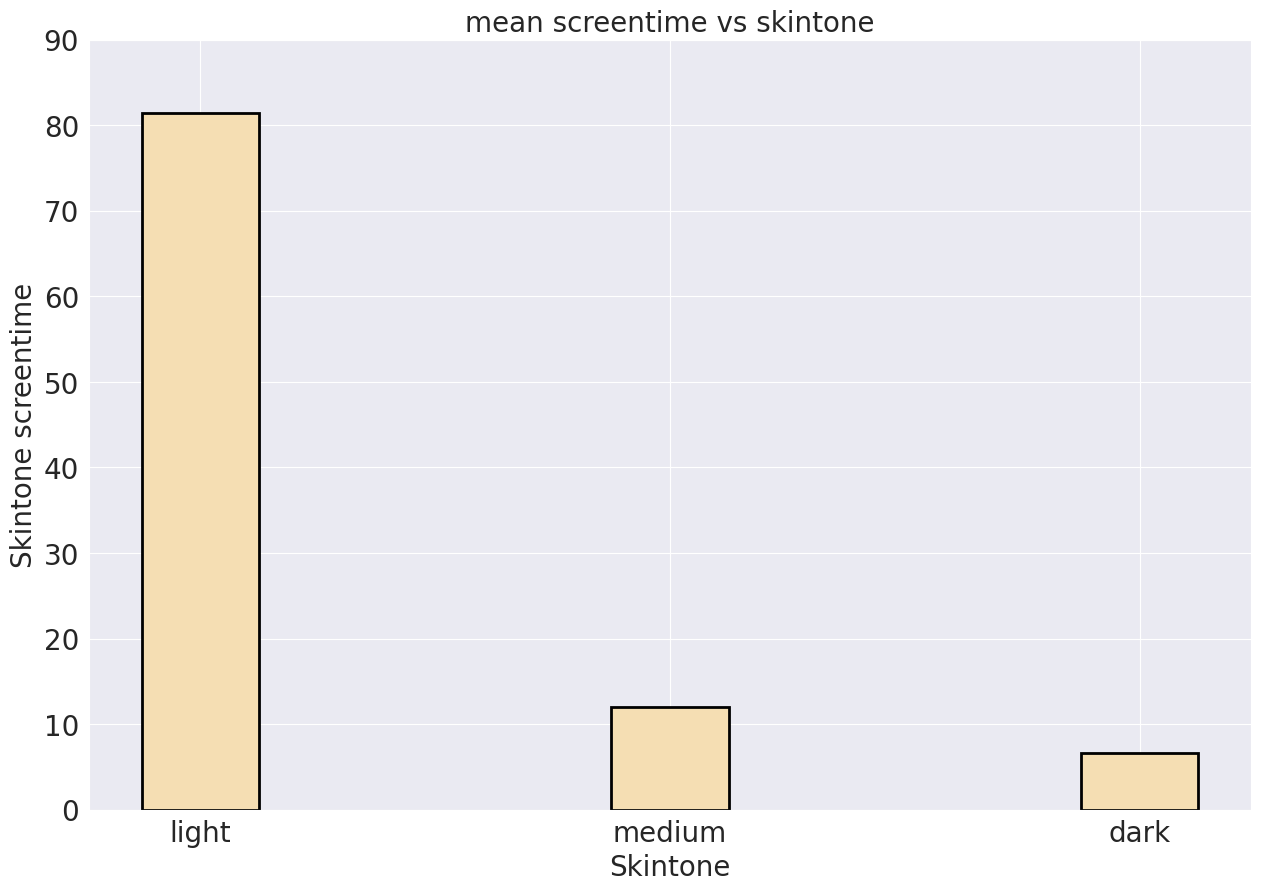

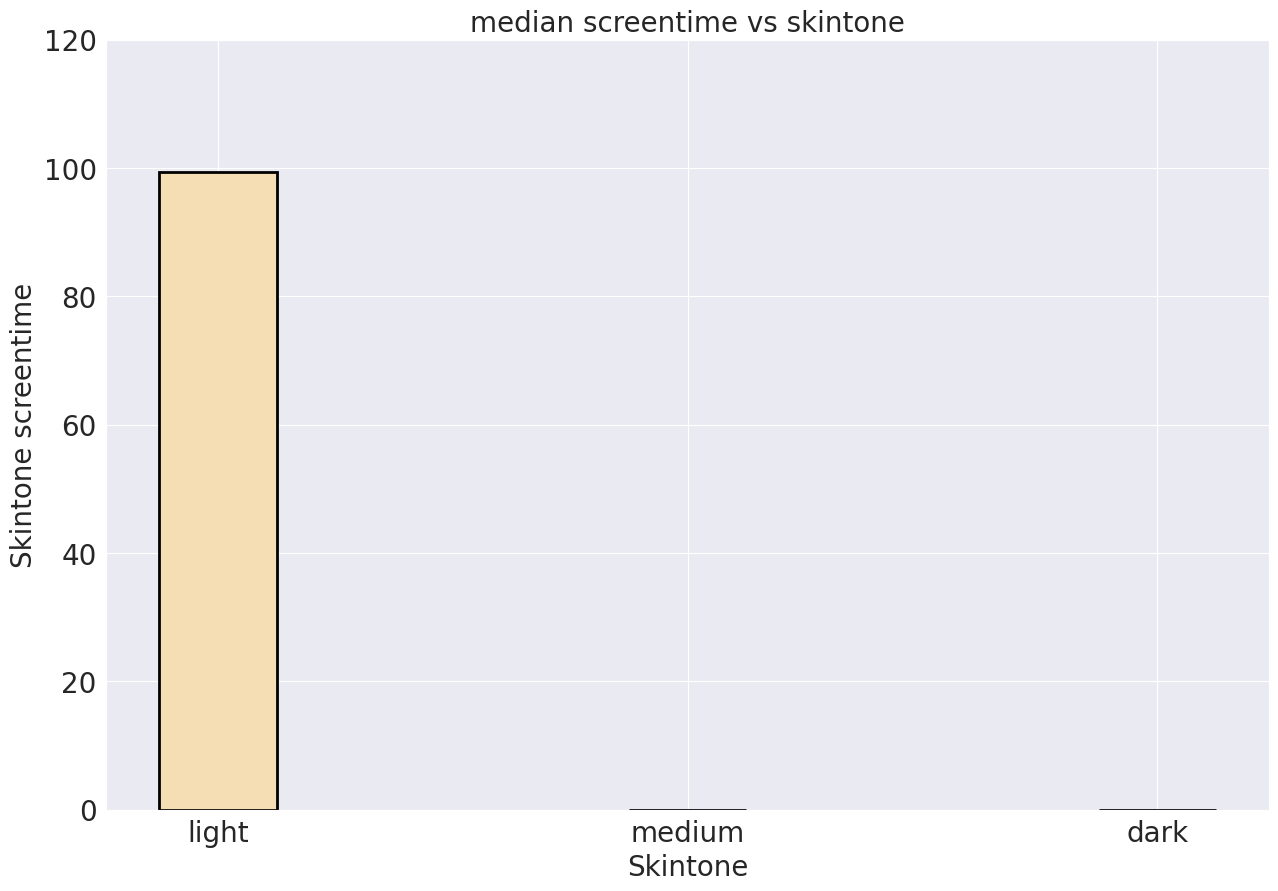

In [16]:
#plot the skintone unconditional distribution
from collections import Counter
def plot_skintone_screentime(data,keys,metric="median"):
    
    fig, ax = plt.subplots()
    # create a bar plot of the dictionary
    ax.bar(keys,data,edgecolor='black',linewidth=2, color='#F5DEB3', width=0.25)

    # set the title and axis labels
    title=metric+" screentime vs skintone"
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Skintone', fontsize=20)
    ax.set_ylabel('Skintone screentime', fontsize=20)

    # get the x-tick labels
    labels = ax.get_xticklabels()
    yticks = ax.get_yticks()
    ax.set_yticks(yticks)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

    #plt.show()
    #save the plots
    filename=metric+"_skintone_screentime.png"
    plt.savefig('plots/'+filename,dpi=300)


rp_data['light_screentime']=rp_data['light']/rp_data['total_faces']
rp_data['medium_screentime']=rp_data['medium']/rp_data['total_faces']
rp_data['dark_screentime']=rp_data['dark']/rp_data['total_faces']

print(Counter(list(rp_data['light_screentime'])).most_common(5))
print(Counter(list(rp_data['medium_screentime'])).most_common(5))
print(Counter(list(rp_data['dark_screentime'])).most_common(5))

#mean and median values of screentime
light_screentime_mean=rp_data['light_screentime'].mean()*100
medium_screentime_mean=rp_data['medium_screentime'].mean()*100
dark_screentime_mean=rp_data['dark_screentime'].mean()*100

light_screentime_median=rp_data['light_screentime'].median()*100
medium_screentime_median=rp_data['medium_screentime'].median()*100
dark_screentime_median=rp_data['dark_screentime'].median()*100

keys=['light','medium','dark']

#mean and median data 
mean_data=[light_screentime_mean,medium_screentime_mean,dark_screentime_mean]
median_data=[light_screentime_median,medium_screentime_median,dark_screentime_median]
print(median_data)
print(mean_data)
plot_skintone_screentime(mean_data,keys,metric="mean")
plot_skintone_screentime(median_data,keys,metric="median")

In [17]:
rp_data.columns

Index(['Filename', 'Advertiser', 'Date', 'Version', 'Country', 'Duration',
       'Description', 'Brand/Product', 'ProductAdvertiser', 'Title',
       ...
       '[6.1, 7.1)', '[7.1, 8.1)', '[8.1, 9.1)', '[9.1, 10.1)', 'light',
       'medium', 'dark', 'light_screentime', 'medium_screentime',
       'dark_screentime'],
      dtype='object', length=173)

In [18]:
#save the rp data in current format
rp_data.to_csv('RP_data_screentime_metrics_filtered_data.csv',index=False)

In [26]:
#### per gender age distribution ####
## per gender bins plot the distribution across age groups
## distribution:
### 1. male x {(0-15), (15-25), (25-35), (35-45), (45-75)}
### 2. female x {(0-15), (15-25), (25-35), (35-45), (45-75)}

#extract male data
male_cols=[col for col in rp_data.columns if 'male' in col and 'female' not in col]
male_data=rp_data[male_cols]
male_data['masculine_faces']=rp_data['masculine_faces']

age_bins=['[0, 15)','[15, 25)','[25, 35)','[35, 45)', '[45, 55)','[55, 65)', '[65, 75)']
condensed_age_bins=['[0, 15)','[15, 25)','[25, 35)','[35, 45)','[45,75)']

for age in age_bins:
    
    age_col=[col for col in male_data.columns if age in col]
    age_data=male_data[age_col]
    male_data[age]=age_data.sum(axis=1)
    
male_data['[45, 75)']=male_data['[45, 55)']+male_data['[55, 65)']+male_data['[65, 75)']


#### per age gender distribution ####
### 1. (0-15) x {female}, (15-25) x {female}
female_cols=[col for col in rp_data.columns if 'female' in col and 'male' not in col]
female_data=rp_data[female_cols]
female_data['feminine_faces']=rp_data['feminine_faces']

for age in age_bins:
    
    age_col=[col for col in female_data.columns if age in col]
    age_fem_data=female_data[age_col]
    female_data[age]=age_fem_data.sum(axis=1)
    

female_data['[45, 75)']=female_data['[45, 55)']+female_data['[55, 65)']+female_data['[65, 75)']


#organize data as follows:
#index=[male,female]
#male =[mean(0,15), mean(15,25), mean(25,35), mean(35,45), mean(45,75)]

#compute means 

male_data_mean=[]
for age_bin in condensed_age_bins:
    screen_df_male=male_data[age_bin]/male_data['masculine_faces']
    male_data_mean.append(list(mean(screen_df_male)))
    
female_data_mean=[]
for age_bin in condensed_age_bins:
    screen_df_female=female_data[age_bin]/female_data['femnine_faces']
    female_data_mean.append(flist(mean(screen_df_female)))
    
index=['male','female']

# Bar plot
fig, ax = plt.subplots()
bar_width = 0.25
opacity = 0.8
index = np.arange(len(male_data_mean))

rects1 = ax.bar(index, male_data_mean, bar_width,
                alpha=opacity,
                color='b',
                label='male')

rects2 = ax.bar(index + bar_width, female_data_mean, bar_width,
                alpha=opacity,
                color='g',
                label='Group 2')

# Axes labels, title, and ticks
ax.set_xlabel('Groups')
ax.set_ylabel('Values')

Index(['(male, [0, 15), [-inf, 1.1))', '(male, [0, 15), [1.1, 2.1))',
       '(male, [0, 15), [2.1, 3.1))', '(male, [0, 15), [3.1, 4.1))',
       '(male, [0, 15), [4.1, 5.1))', '(male, [0, 15), [5.1, 6.1))',
       '(male, [0, 15), [6.1, 7.1))', '(male, [0, 15), [7.1, 8.1))',
       '(male, [0, 15), [8.1, 9.1))', '(male, [15, 25), [-inf, 1.1))',
       '(male, [15, 25), [1.1, 2.1))', '(male, [15, 25), [2.1, 3.1))',
       '(male, [15, 25), [3.1, 4.1))', '(male, [15, 25), [4.1, 5.1))',
       '(male, [15, 25), [5.1, 6.1))', '(male, [15, 25), [6.1, 7.1))',
       '(male, [15, 25), [7.1, 8.1))', '(male, [15, 25), [8.1, 9.1))',
       '(male, [15, 25), [9.1, 10.1))', '(male, [25, 35), [-inf, 1.1))',
       '(male, [25, 35), [1.1, 2.1))', '(male, [25, 35), [2.1, 3.1))',
       '(male, [25, 35), [3.1, 4.1))', '(male, [25, 35), [4.1, 5.1))',
       '(male, [25, 35), [5.1, 6.1))', '(male, [25, 35), [6.1, 7.1))',
       '(male, [25, 35), [7.1, 8.1))', '(male, [25, 35), [8.1, 9.1))',
       '(ma

/tmp/ipykernel_6691/4086412898.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data[age]=age_data.sum(axis=1)
/tmp/ipykernel_6691/4086412898.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data[age]=age_data.sum(axis=1)
/tmp/ipykernel_6691/4086412898.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [28]:
print(male_data['[25, 35)'])

0        15
1       353
2       205
3        35
4         0
       ... 
7643      5
7644      3
7645      1
7646     73
7647     31
Name: [25, 35), Length: 7648, dtype: int64


In [ ]:
#### per gender skintone distribution ####




#### per skintone gender distribution ####